# Alucar - Analisando as vendas

In [1]:
import pandas as pd

In [2]:
pd.read_csv('data/alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
alucar = pd.read_csv('data/alucar.csv')

In [4]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [5]:
print('Quantidade de linhas e colunas: ', alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


In [7]:
print('Quantidade de dados nulos: ', alucar.isna().sum().sum())

Quantidade de dados nulos:  0


In [8]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [9]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [10]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [11]:
# !pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [12]:
print(sns.__version__)

0.9.0


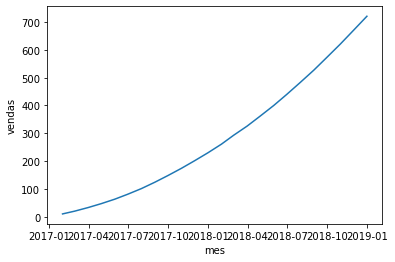

In [13]:
sns.lineplot(x='mes', y='vendas', data=alucar)